# Figure 2: basin sizes

In [1]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

sys.path.append("../code/")

from hypersync_draw import *
from hypersync_generate import *
from hypersync_identify import *
from hypersync_integrate import *

sb.set_theme(style="ticks", context="paper")

results_dir = "../results/"
data_dir = "../data/"

Path(results_dir).mkdir(parents=True, exist_ok=True)
Path(data_dir).mkdir(parents=True, exist_ok=True)

In [2]:
N = 100
nreps = 1003
suf = "di"  # "di"

In [3]:
file_name = f"../data/freq.txt"

k2s = np.arange(0, 5, 0.5)

df = pd.read_csv(file_name, sep=" ")
df["k2"] = k2s
df = df.melt(id_vars="k2", value_name="proba", var_name="q")
df["q"] = df["q"].astype(int)
df["state"] = df["q"].apply(lambda x: "non-twist" if x > 98 else f"{x}-twisted")

df["ostate"] = df["q"].apply(lambda x: "non-twist" if x > 98 else f"$q={x}$")


df

,k2,q,proba,state,ostate
0,0.0,-6,0.00000,-6-twisted,$q=-6$
1,0.5,-6,0.00000,-6-twisted,$q=-6$
2,1.0,-6,0.00000,-6-twisted,$q=-6$
3,1.5,-6,0.00001,-6-twisted,$q=-6$
4,2.0,-6,0.00010,-6-twisted,$q=-6$
...,...,...,...,...,...
135,2.5,99,0.56715,non-twist,non-twist
136,3.0,99,0.80490,non-twist,non-twist
137,3.5,99,0.90558,non-twist,non-twist
138,4.0,99,0.97219,non-twist,non-twist


In [4]:
mask_pos = df["q"] >= 0
mask_nobig = (98 < df["q"]) + (df["q"] < 5)

(0.0005, 1.2)

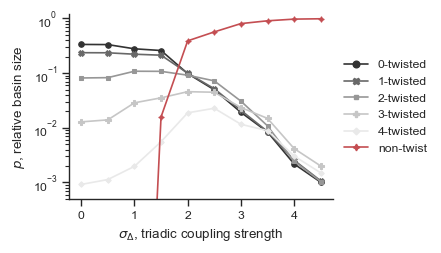

In [250]:
# labels = [f"{i}-twisted" for i in range(5)] + ["other"]
labels = [i for i in df[mask_pos * mask_nobig].state.unique() if "twisted" in i] + [
    "non-twist"
]

fig, ax = plt.subplots(figsize=(3.4, 2.4))
g = sb.lineplot(
    data=df[mask_pos * mask_nobig],
    x="k2",
    y="proba",
    hue="state",
    markers=True,
    ax=ax,
    # alpha=0.7,
    style="state",
    dashes=False,
    # hue_order=labels,
    ms=4,
    mec=None,
    # mfc="w",
    palette=sb.color_palette("Greys_r", n_colors=len(labels) - 1) + ["r"],
)

g.set(yscale="log")
sb.move_legend(g, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, title="")

ax.set_xlabel(r"$\sigma_{\Delta}$, triadic coupling strength")
ax.set_ylabel("$p$, relative basin size")

# title = f"ring {suf}, N={N}, nreps={nreps}"
# ax.set_title(title)

sb.despine()
ax.set_ylim(ymin=5e-4, ymax=1.2)

# fig_name = f"basin_size_ring_{suf}_N_{N}_nreps_{nreps}"

# plt.savefig(f"{results_dir}figure_2a.png", dpi=250, bbox_inches="tight")
# plt.savefig(f"{results_dir}figure_2a.pdf", dpi=250, bbox_inches="tight")

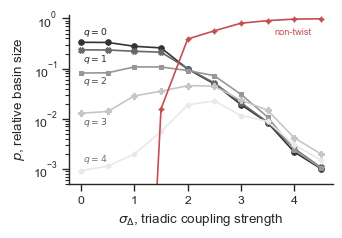

In [9]:
# labels = [f"{i}-twisted" for i in range(5)] + ["other"]
labels = [i for i in df[mask_pos * mask_nobig].ostate.unique() if "q" in i] + [
    "non-twist"
]

fig, ax = plt.subplots(figsize=(3.4, 2.2))
g = sb.lineplot(
    data=df[mask_pos * mask_nobig],
    x="k2",
    y="proba",
    hue="ostate",
    markers=True,
    ax=ax,
    # alpha=0.7,
    style="state",
    dashes=False,
    # hue_order=labels,
    ms=4,
    mec=None,
    # mfc="w",
    palette=sb.color_palette("Greys_r", n_colors=len(labels) - 1) + ["r"],
    legend=False,
)

g.set(yscale="log")
# sb.move_legend(g, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, title="")

ax.set_xlabel(r"$\sigma_{\Delta}$, triadic coupling strength")
ax.set_ylabel("$p$, relative basin size")

# title = f"ring {suf}, N={N}, nreps={nreps}"
# ax.set_title(title)

sb.despine()
ax.set_ylim(ymin=5e-4, ymax=1.2)

colors = sb.color_palette("Greys_r", n_colors=len(labels) - 1)
heights = [0.13, 0.35, 0.59, 0.72, 0.88][::-1]
for i in range(len(labels) - 1):
    ax.text(
        0.1,
        heights[i],
        rf"{labels[i]}",
        transform=ax.transAxes,
        ha="center",
        fontsize="x-small",
        c="k",
        alpha=1 - i * 0.1,
    )

ax.text(
    0.85,
    0.88,
    rf"{labels[-1]}",
    transform=ax.transAxes,
    ha="center",
    fontsize="x-small",
    c="r",
)


# fig_name = f"basin_size_ring_{suf}_N_{N}_nreps_{nreps}"

plt.savefig(
    f"{results_dir}figure_2a.png", dpi=250, bbox_inches="tight", pad_inches=0.03
)
plt.savefig(
    f"{results_dir}figure_2a.pdf", dpi=250, bbox_inches="tight", pad_inches=0.03
)